In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import getcwd
from platform import system
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from sklearn import tree

# Decision trees

## Animals dataset

![metrics](images/split_metric.png)
![decision_tree](images/decisiontree1.png)

In [20]:
# Names of data objects
dataobjectNames = [
    "Human",
    "Python",
    "Salmon",
    "Whale",
    "Frog",
    "Komodo dragon",
    "Bat",
    "Pigeon",
    "Cat",
    "Leopard shark",
    "Turtle",
    "Penguin",
    "Porcupine",
    "Eel",
    "Salamander",
]

# Attribute names
attributeNames = [
    "Body temperature",
    "Skin cover",
    "Gives birth",
    "Aquatic creature",
    "Aerial creature",
    "Has legs",
    "Hibernates",
]

# Attribute values
X = np.asarray(
    np.asmatrix(
        """
    1 1 1 0 0 1 0;
    0 2 0 0 0 0 1;
    0 2 0 1 0 0 0;
    1 1 1 1 0 0 0;
    0 0 0 2 0 1 1;
    0 2 0 0 0 1 0;
    1 1 1 0 1 1 1;
    1 3 0 0 1 1 0;
    1 4 1 0 0 1 0;
    0 2 1 1 0 0 0;
    0 2 0 2 0 1 0;
    1 3 0 2 0 1 0;
    1 5 1 0 0 1 1;
    0 2 0 1 0 0 0;
    0 0 0 2 0 1 1 """
    )
)

# Class indices
y = np.asarray(np.asmatrix("3 4 2 3 0 4 3 1 3 2 4 1 3 2 0").T).squeeze()

# Class names
classNames = ["Amphibian", "Bird", "Fish", "Mammal", "Reptile"]

# Number data objects, attributes, and classes
N, M = X.shape
C = len(classNames)

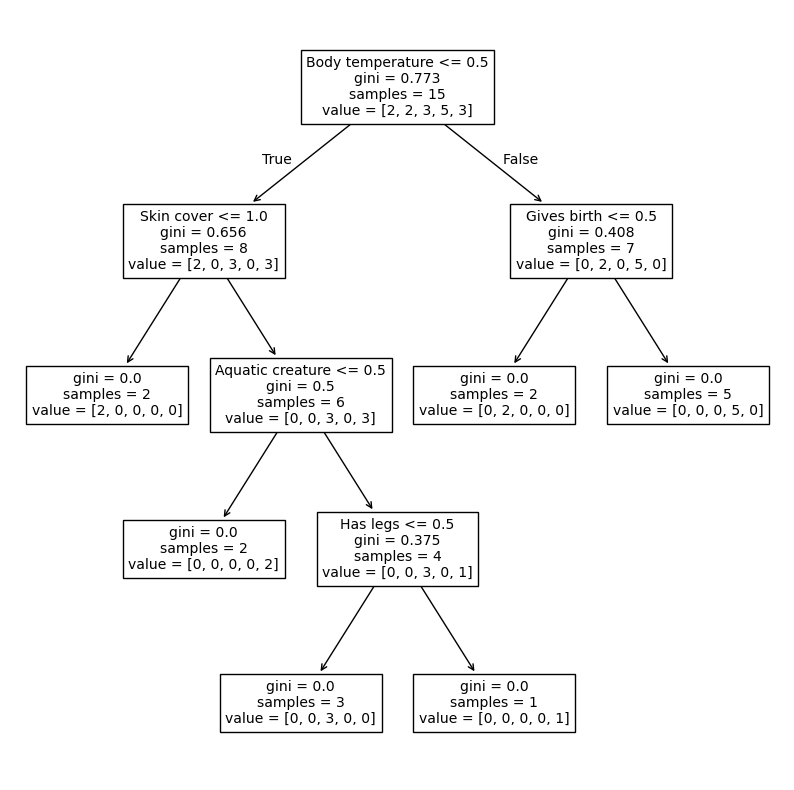

In [21]:
# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)
dtc = dtc.fit(X, y)

# Visualize the graph (you can also inspect the generated image file in an external program)
# NOTE: depending on your setup you may need to decrease or increase the figsize and DPI setting
# to get a readable plot. Hint: Try to maximize the figure after it displays.
fname = "tree_ex512_" + criterion + ".png"

fig = plt.figure(figsize=(10, 10), dpi=100)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)
# plt.savefig(fname)
plt.show()

### Entropy split instead of Gini

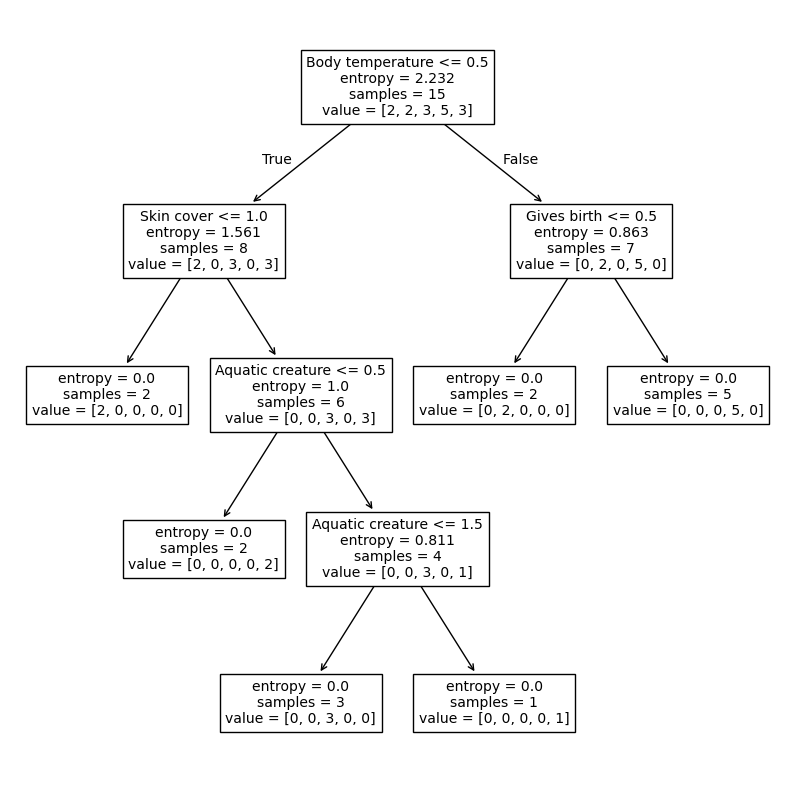

In [22]:
# Fit regression tree classifier, Gini split criterion, no pruning
criterion = "entropy"
# dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=2)
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=1.0 / N)
dtc = dtc.fit(X, y)

# convert the tree into a png file using the Graphviz toolset
fname = "tree_ex513_" + criterion + ".png"

# Visualize the graph (you can also inspect the generated image file in an external program)
# NOTE: depending on your setup you may need to decrease or increase the figsize and DPI setting
# to get a useful plot. Hint: Try to maximize the figure after it displays.
fig = plt.figure(figsize=(10, 10), dpi=100)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)
plt.show()

In [23]:
# Define a new data object (a dragon) with the attributes given in the text
x = np.array([0, 2, 1, 2, 1, 1, 1]).reshape(1, -1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print("\nNew object attributes:")
print(dict(zip(attributeNames, x[0])))
print("\nClassification result:")
print(classNames[x_class])


New object attributes:
{'Body temperature': 0, 'Skin cover': 2, 'Gives birth': 1, 'Aquatic creature': 2, 'Aerial creature': 1, 'Has legs': 1, 'Hibernates': 1}

Classification result:
Reptile


## Wine dataset

In [24]:
import os
import importlib_resources
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
workingDir = os.getcwd()
print("Running from: " + workingDir)

# Pick the relevant variables
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].astype(int).squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]

attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
classNames = [j[0] for i in mat_data["classNames"] for j in i]

# Remove outliers
outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:, 0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape
N, M

Running from: /home/monkescripts/Documents/NUS/exchange/02450 ML/week5


(6304, 11)

In [25]:
# Fit classification tree using, Gini split criterion, no pruning
criterion = "gini"
dtc = tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=100)
dtc = dtc.fit(X, y)

# Visualize the graph (you can also inspect the generated image file in an external program)
# NOTE: depending on your screen resolution and setup you may need to decrease or increase
# the figsize and DPI setting to get a useful plot.
# Hint: Try to open the generated png file in an external image editor as it can be easier
# to inspect outside matplotlib's figure environment.
fname = "tree_ex516_" + criterion + "_wine_data.png"
fig = plt.figure(figsize=(20, 20), dpi=500)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)
plt.axis("off")
plt.box("off")
plt.show()

In [26]:
# Define a new data object (new type of wine) with the attributes given in the text
x = np.array([6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.44, 12]).reshape(1, -1)

# Evaluate the classification tree for the new data object
x_class = dtc.predict(x)[0]

# Print results
print("\nNew object attributes:")
for i in range(len(attributeNames)):
    print("{0}: {1}".format(attributeNames[i], x[0][i]))
print("\nClassification result:")
print(classNames[x_class])


New object attributes:
Fixed acidity: 6.9
Volatile acidity: 1.09
Citric acid: 0.06
Residual sugar: 2.1
Chlorides: 0.0061
Free sulfur dioxide: 12.0
Total sulfur dioxide: 31.0
Density: 0.99
pH: 3.5
Sulphates: 0.44
Alcohol: 12.0

Classification result:
White


# Regression
![regression1](images/regression.png)

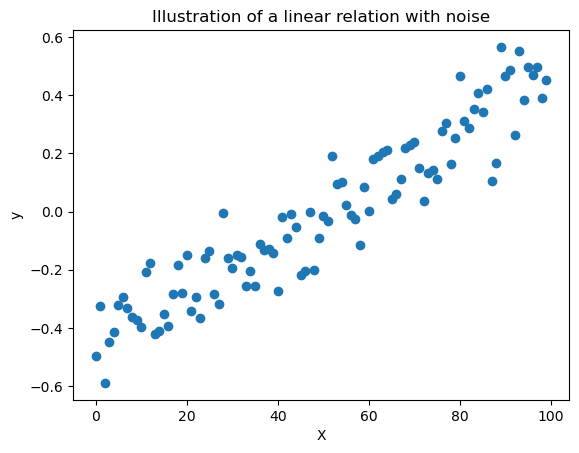

In [27]:
# Number of data objects
N = 100

# Attribute values
X = np.array(range(N))

# Noise
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std * np.random.randn(N) + eps_mean)

# Model parameters
w0 = -0.5
w1 = 0.01

# Outputs
y = w0 + w1 * X + eps

# Make a scatter plot
plt.figure()
plt.plot(X, y, "o")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Illustration of a linear relation with noise")
plt.show()

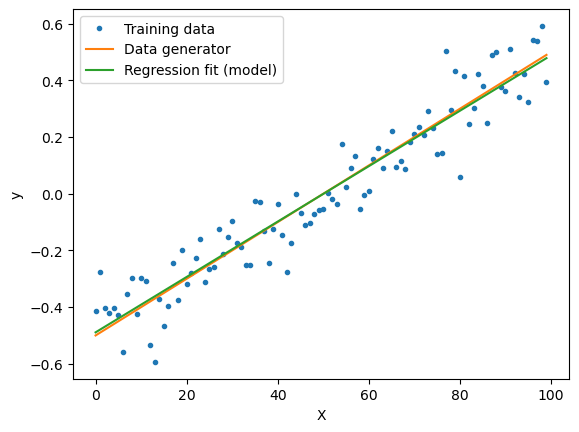

In [28]:
import sklearn.linear_model as lm


# Use dataset as in the previous exercise
N = 100
X = np.array(range(N)).reshape(-1, 1)
eps_mean, eps_std = 0, 0.1
eps = np.array(eps_std * np.random.randn(N) + eps_mean).reshape(-1, 1)
w0 = -0.5
w1 = 0.01
y = w0 + w1 * X + eps
y_true = y - eps

# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=True)
model = model.fit(X, y)
# Compute model output:
y_est = model.predict(X)
# Or equivalently:
# y_est = model.intercept_ + X @ model.coef_


# Plot original data and the model output
f = plt.figure()

plt.plot(X, y, ".")
plt.plot(X, y_true, "-")
plt.plot(X, y_est, "-")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(["Training data", "Data generator", "Regression fit (model)"])

plt.show()

![regression2](images/regression2.png)

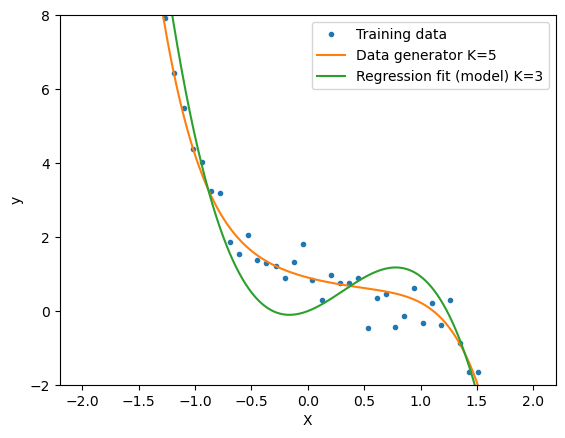

In [30]:
# Parameters
Kd = 5  # no of terms for data generator
Km = 3  # no of terms for regression model
N = 50  # no of data objects to train a model
Xe = np.linspace(-2, 2, 1000).reshape(
    -1, 1
)  # X values to visualize true data and model
eps_mean, eps_std = 0, 0.5  # noise parameters

# Generate dataset (with noise)
X = np.linspace(-2, 2, N).reshape(-1, 1)
Xd = np.power(X, range(1, Kd + 1))
eps = eps_std * np.random.randn(N) + eps_mean
w = -np.power(-0.9, range(1, Kd + 2))
y = w[0] + Xd @ w[1:] + eps


# True data generator (assuming no noise)
Xde = np.power(Xe, range(1, Kd + 1))
y_true = w[0] + Xde @ w[1:]


# Fit ordinary least squares regression model
Xm = np.power(X, range(1, Km + 1))
model = lm.LinearRegression()
model = model.fit(Xm, y)

# Predict values
Xme = np.power(Xe, range(1, Km + 1))
y_est = model.predict(Xme)

# Plot original data and the model output
f = plt.figure()
plt.plot(X, y, ".")
plt.plot(Xe, y_true, "-")
plt.plot(Xe, y_est, "-")
plt.xlabel("X")
plt.ylabel("y")
plt.ylim(-2, 8)
plt.legend(
    [
        "Training data",
        "Data generator K={0}".format(Kd),
        "Regression fit (model) K={0}".format(Km),
    ]
)

plt.show()

In [45]:
import os
import importlib_resources
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
workingDir = os.getcwd()
print("Running from: " + workingDir)

# Pick the relevant variables
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].astype(int).squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]

attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
classNames = [j[0] for i in mat_data["classNames"] for j in i]

# Remove outliers
outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:, 0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape
N, M

Running from: /home/monkescripts/Documents/NUS/exchange/02450 ML/week5


(6304, 11)

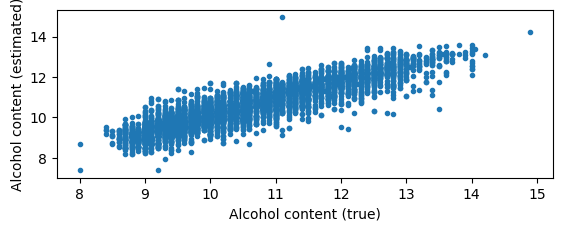

In [46]:
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# Split dataset into features and target vector
alcohol_idx = attributeNames.index("Alcohol")
y = X[:, alcohol_idx]

X_cols = list(range(0, alcohol_idx)) + list(range(alcohol_idx + 1, len(attributeNames)))
X = X[:, X_cols]

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X, y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est - y

# Display scatter plot
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y, y_est, ".")
plt.xlabel("Alcohol content (true)")
plt.ylabel("Alcohol content (estimated)")
plt.show()

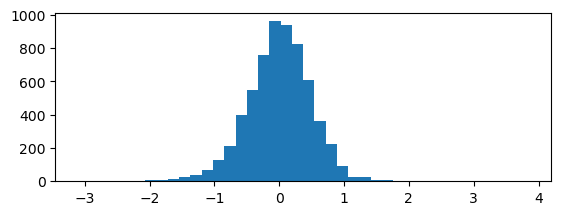

In [37]:
plt.subplot(2, 1, 2)
plt.hist(residual, 40)

plt.show()

The model is of the form:
Alcohol = β₀ + β₁·Fixed_Acidity + β₂·Volatile_Acidity + β₃·Density + ... + β₁₀·Predictor_10
where β₃ is the coefficient for density.
Each coefficient (βᵢ) represents the change in alcohol content for a 1-unit increase in the corresponding predictor, holding all other predictors constant.

In [41]:
attributeNames

['Fixed acidity',
 'Volatile acidity',
 'Citric acid',
 'Residual sugar',
 'Chlorides',
 'Free sulfur dioxide',
 'Total sulfur dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol']

In [42]:
id = attributeNames.index("Density")
model.coef_[id]

-631.0551837915025

In [55]:
import os
import importlib_resources
import numpy as np
from scipy.io import loadmat

# Load Matlab data file and extract variables of interest
filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")
workingDir = os.getcwd()
print("Running from: " + workingDir)

# Pick the relevant variables
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].astype(int).squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]

attributeNames = [i[0][0] for i in mat_data["attributeNames"]]
classNames = [j[0] for i in mat_data["classNames"] for j in i]

# Remove outliers
outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
# Remove attribute 12 (Quality score)
X = X[:, 0:11]
attributeNames = attributeNames[0:11]
# Update N and M
N, M = X.shape
N, M

Running from: /home/monkescripts/Documents/NUS/exchange/02450 ML/week5


(6304, 11)

In [56]:
list(range(0, alcohol_idx)), list(range(alcohol_idx + 1, len(attributeNames)))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [])

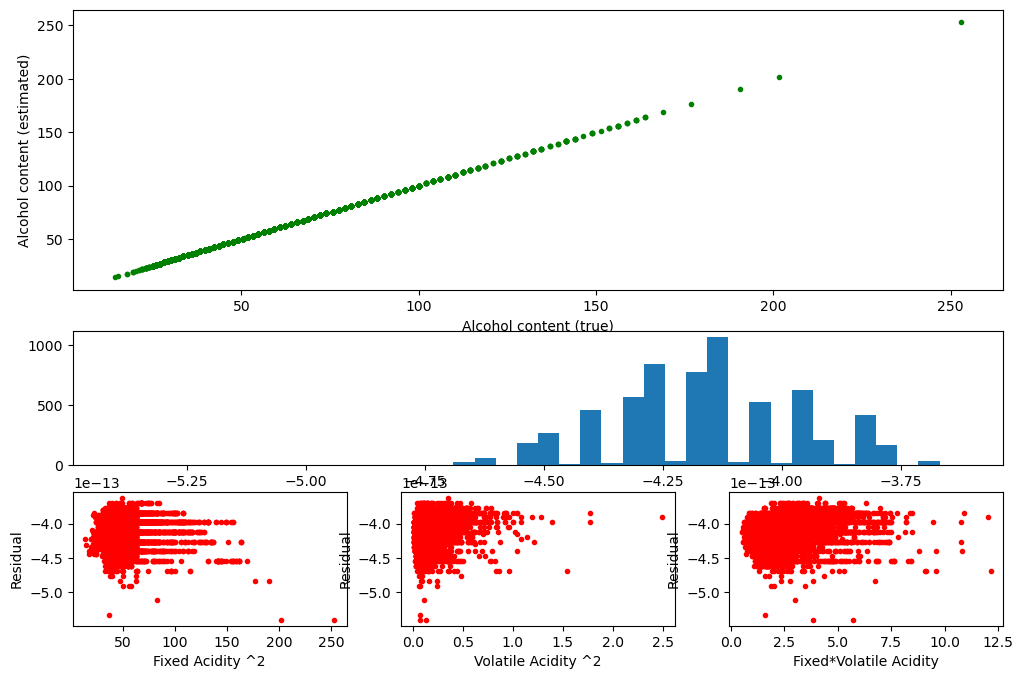

In [ ]:
# Split dataset into features and target vector
alcohol_idx = attributeNames.index("Alcohol")
y = X[:, alcohol_idx]
# Exclude the alcohol idx column
X_cols = list(range(0, alcohol_idx)) + list(range(alcohol_idx + 1, len(attributeNames)))
X = X[:, X_cols]

# Additional nonlinear attributes
fa_idx = attributeNames.index("Fixed acidity")
va_idx = attributeNames.index("Volatile acidity")
Xfa2 = np.power(X[:, fa_idx], 2).reshape(-1, 1)
Xva2 = np.power(X[:, va_idx], 2).reshape(-1, 1)
Xfava = (X[:, fa_idx] * X[:, va_idx]).reshape(-1, 1)
X = np.asarray(np.bmat("X, Xfa2, Xva2, Xfava"))

# Fit ordinary least squares regression model
model = lm.LinearRegression()
model.fit(X, y)

# Predict alcohol content
y_est = model.predict(X)
residual = y_est - y

# Display plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(y, y_est, ".g")
plt.xlabel("Alcohol content (true)")
plt.ylabel("Alcohol content (estimated)")

plt.subplot(4, 1, 3)
plt.hist(residual, 40)

plt.subplot(4, 3, 10)
plt.plot(Xfa2, residual, ".r")
plt.xlabel("Fixed Acidity ^2")
plt.ylabel("Residual")

plt.subplot(4, 3, 11)
plt.plot(Xva2, residual, ".r")
plt.xlabel("Volatile Acidity ^2")
plt.ylabel("Residual")

plt.subplot(4, 3, 12)
plt.plot(Xfava, residual, ".r")
plt.xlabel("Fixed*Volatile Acidity")
plt.ylabel("Residual")

plt.show()